# Basic pre-processing and cell filtering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy.api as sc
import matplotlib as mpl
from matplotlib import rcParams

import seaborn as sns
import scipy as sci

import gseapy as gp
from xlrd import XLRDError
import xlsxwriter

/Users/sophie/miniconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
sc.settings.verbosity = 3
sc.logging.print_versions()

scanpy==1.0.4+92.g9a754bb.dirty anndata==0.5.10 numpy==1.14.2 scipy==1.0.1 pandas==0.22.0 scikit-learn==0.19.1 statsmodels==0.8.0 python-igraph==0.7.1 louvain==0.6.1 


In [4]:
sc.settings.writedir='./data/'
sc.settings.figdir='./figures/'

In [5]:
sc.set_figure_params(vector_friendly=True,color_map='RdBu_r',dpi_save=600)

## QC and filter raw data

**Note**: This only needs to be run when starting from 10X output files. Concatenated and annotated raw data count matrix is provided on GEO as an AnnData object save as h5-file (adata_raw.h5). When using the h5-file you can directly start from the section "Load raw count matrix provided on GEO" below.

In [6]:
def qc_metrics(adata):
    
    # mean expression per gene
    adata.var["mean"] = adata.X.mean(axis=0).T
    # fraction of 0s per genes
    adata.var["frac_zeros"] = (adata.X.shape[0] - (adata.X > 0).sum(axis=0).T) / adata.X.shape[0]
    
    # for each cell compute fraction of counts in mito genes vs. all genes
    mito_genes = [name for name in adata.var_names if name.startswith('mt-')]
    mt_gene_index = np.where(mito_genes)[0]
    adata.obs['percent_mito'] = adata[:, mt_gene_index].X.sum(axis=1) / adata.X.sum(axis=1)
    # for each cell compute fraction of counts in ribosomal genes vs. all genes
    ribo_genes = [name for name in adata.var_names if name.startswith('Rp')]
    ribo_gene_index = np.where(ribo_genes)[0]
    adata.obs['percent_ribo'] = adata[:, ribo_gene_index].X.sum(axis=1) / adata.X.sum(axis=1)

    # total counts and genes per cell
    adata.obs['n_counts'] = np.sum(adata.X, axis=1).A1
    adata.obs['n_genes'] = np.sum(adata.X > 0, axis=1).A1
    print(len(adata.obs_names))
    
    return(adata)

In [7]:
def cell_filter(adata, countmin):
    #filter cells with > countmin number of counts and >1000 genes. Countmin is defined based on the CellRanger output. 
    
    # get cell barcode indices
    res_cells = sc.pp.filter_cells(adata.X,min_counts=countmin,copy=True)
    res_genes = sc.pp.filter_cells(adata.X,min_genes=1000,copy=True)
    res_all = np.array([any(tup) for tup in zip(res_cells[0], res_genes[0])])
    
    # filter
    adata_filt=adata.copy()[res_all,:]
    print(adata_filt.n_obs)
    return(adata_filt)

In [ ]:
# CD_1
filename_data_CD_1 = './data/CD_1/mm10/matrix.mtx'
filename_genes_CD_1 = './data/CD_1/mm10/genes.tsv'
filename_barcodes_CD_1 = './data/CD_1/mm10/barcodes.tsv'

adata_CD_1 = sc.read(filename_data_CD_1, cache=True).transpose()
adata_CD_1.var_names = np.genfromtxt(filename_genes_CD_1, dtype=str)[:, 1]
adata_CD_1.obs_names = np.genfromtxt(filename_barcodes_CD_1, dtype=str)
adata_CD_1.var_names_make_unique()

filename_data_CD_1 = './data/CD_1/raw_gene_bc_matrices/mm10/matrix.mtx'
filename_genes_CD_1 = './data/CD_1/raw_gene_bc_matrices/mm10/genes.tsv'
filename_barcodes_CD_1 = './data/CD_1/raw_gene_bc_matrices/mm10/barcodes.tsv'

adata_CD_1_raw = sc.read(filename_data_CD_1, cache=True).transpose()
adata_CD_1_raw.var_names = np.genfromtxt(filename_genes_CD_1, dtype=str)[:, 1]
adata_CD_1_raw.obs_names = np.genfromtxt(filename_barcodes_CD_1, dtype=str)

adata_CD_1_raw.var_names_make_unique()

# CD_2
filename_data_CD_2 = './data/CD_2/mm10/matrix.mtx'
filename_genes_CD_2 = './data/CD_2/mm10/genes.tsv'
filename_barcodes_CD_2 = './data/CD_2/mm10/barcodes.tsv'

adata_CD_2 = sc.read(filename_data_CD_2, cache=True).transpose()
adata_CD_2.var_names = np.genfromtxt(filename_genes_CD_2, dtype=str)[:, 1]
adata_CD_2.obs_names = np.genfromtxt(filename_barcodes_CD_2, dtype=str)

adata_CD_2.var_names_make_unique()

filename_data_CD_2 = './data/CD_2/raw_gene_bc_matrices/mm10/matrix.mtx'
filename_genes_CD_2 = './data/CD_2/raw_gene_bc_matrices/mm10/genes.tsv'
filename_barcodes_CD_2 = './data/CD_2/raw_gene_bc_matrices/mm10/barcodes.tsv'

adata_CD_2_raw = sc.read(filename_data_CD_2, cache=True).transpose()
adata_CD_2_raw.var_names = np.genfromtxt(filename_genes_CD_2, dtype=str)[:, 1]
adata_CD_2_raw.obs_names = np.genfromtxt(filename_barcodes_CD_2, dtype=str)

adata_CD_2_raw.var_names_make_unique()

# CD_3
filename_data_CD_3 = './data/CD_3/mm10/matrix.mtx'
filename_genes_CD_3 = './data/CD_3/mm10/genes.tsv'
filename_barcodes_CD_3 = './data/CD_3/mm10/barcodes.tsv'

adata_CD_3 = sc.read(filename_data_CD_3, cache=True).transpose()
adata_CD_3.var_names = np.genfromtxt(filename_genes_CD_3, dtype=str)[:, 1]
adata_CD_3.obs_names = np.genfromtxt(filename_barcodes_CD_3, dtype=str)

adata_CD_3.var_names_make_unique()

filename_data_CD_3 = './data/CD_3/raw_gene_bc_matrices/mm10/matrix.mtx'
filename_genes_CD_3 = './data/CD_3/raw_gene_bc_matrices/mm10/genes.tsv'
filename_barcodes_CD_3 = './data/CD_3/raw_gene_bc_matrices/mm10/barcodes.tsv'

adata_CD_3_raw = sc.read(filename_data_CD_3, cache=True).transpose()
adata_CD_3_raw.var_names = np.genfromtxt(filename_genes_CD_3, dtype=str)[:, 1]
adata_CD_3_raw.obs_names = np.genfromtxt(filename_barcodes_CD_3, dtype=str)
adata_CD_3_raw.var_names_make_unique()

# HFD_1
filename_data_HFD_1 = './data/HFD_1/mm10/matrix.mtx'
filename_genes_HFD_1 = './data/HFD_1/mm10/genes.tsv'
filename_barcodes_HFD_1 = './data/HFD_1/mm10/barcodes.tsv'

adata_HFD_1 = sc.read(filename_data_HFD_1, cache=True).transpose()
adata_HFD_1.var_names = np.genfromtxt(filename_genes_HFD_1, dtype=str)[:, 1]
adata_HFD_1.obs_names = np.genfromtxt(filename_barcodes_HFD_1, dtype=str)

adata_HFD_1.var_names_make_unique()

filename_data_HFD_1 = './data/HFD_1/raw_gene_bc_matrices/mm10/matrix.mtx'
filename_genes_HFD_1 = './data/HFD_1/raw_gene_bc_matrices/mm10/genes.tsv'
filename_barcodes_HFD_1 = './data/HFD_1/raw_gene_bc_matrices/mm10/barcodes.tsv'

adata_HFD_1_raw = sc.read(filename_data_HFD_1, cache=True).transpose()
adata_HFD_1_raw.var_names = np.genfromtxt(filename_genes_HFD_1, dtype=str)[:, 1]
adata_HFD_1_raw.obs_names = np.genfromtxt(filename_barcodes_HFD_1, dtype=str)

adata_HFD_1_raw.var_names_make_unique()

# HFD_2
filename_data_HFD_2 = './data/HFD_2/mm10/matrix.mtx'
filename_genes_HFD_2 = './data/HFD_2/mm10/genes.tsv'
filename_barcodes_HFD_2 = './data/HFD_2/mm10/barcodes.tsv'

adata_HFD_2 = sc.read(filename_data_HFD_2, cache=True).transpose()
adata_HFD_2.var_names = np.genfromtxt(filename_genes_HFD_2, dtype=str)[:, 1]
adata_HFD_2.obs_names = np.genfromtxt(filename_barcodes_HFD_2, dtype=str)

adata_HFD_2.var_names_make_unique()

filename_data_HFD_2 = './data/HFD_2/raw_gene_bc_matrices/mm10/matrix.mtx'
filename_genes_HFD_2 = './data/HFD_2/raw_gene_bc_matrices/mm10/genes.tsv'
filename_barcodes_HFD_2 = './data/HFD_2/raw_gene_bc_matrices/mm10/barcodes.tsv'

adata_HFD_2_raw = sc.read(filename_data_HFD_2, cache=True).transpose()
adata_HFD_2_raw.var_names = np.genfromtxt(filename_genes_HFD_2, dtype=str)[:, 1]
adata_HFD_2_raw.obs_names = np.genfromtxt(filename_barcodes_HFD_2, dtype=str)

adata_HFD_2_raw.var_names_make_unique()


# HFD_3
filename_data_HFD_3 = './data/HFD_3/mm10/matrix.mtx'
filename_genes_HFD_3 = './data/HFD_3/mm10/genes.tsv'
filename_barcodes_HFD_3 = './data/HFD_3/mm10/barcodes.tsv'

adata_HFD_3 = sc.read(filename_data_HFD_3, cache=True).transpose()
adata_HFD_3.var_names = np.genfromtxt(filename_genes_HFD_3, dtype=str)[:, 1]
adata_HFD_3.obs_names = np.genfromtxt(filename_barcodes_HFD_3, dtype=str)

adata_HFD_3.var_names_make_unique()

filename_data_HFD_3 = './data/HFD_3/raw_gene_bc_matrices/mm10/matrix.mtx'
filename_genes_HFD_3 = './data/HFD_3/raw_gene_bc_matrices/mm10/genes.tsv'
filename_barcodes_HFD_3 = './data/HFD_3/raw_gene_bc_matrices/mm10/barcodes.tsv'

adata_HFD_3_raw = sc.read(filename_data_HFD_3, cache=True).transpose()
adata_HFD_3_raw.var_names = np.genfromtxt(filename_genes_HFD_3, dtype=str)[:, 1]
adata_HFD_3_raw.obs_names = np.genfromtxt(filename_barcodes_HFD_3, dtype=str)

adata_HFD_3_raw.var_names_make_unique()

In [ ]:
### iterative QC and cell filtering
adata_CD_1=qc_metrics(adata_CD_1)

# count threshold from Cellranger filtering (minimal total count)
countmin = min(adata_CD_1.obs['n_counts'])
adata_CD_1_filt= cell_filter(adata_CD_1_raw,countmin)
adata_CD_1_filt=qc_metrics(adata_CD_1_filt)

# threshold on fraction of mitochondria-encoded counts
adata_CD_1_filt=adata_CD_1_filt[adata_CD_1_filt.obs['percent_mito'] < 0.1, :]
adata_CD_1_filt=qc_metrics(adata_CD_1_filt)

In [ ]:
### iterative QC and cell filtering
adata_CD_2=qc_metrics(adata_CD_2)

# count threshold from Cellranger filtering (minimal total count)
countmin = min(adata_CD_2.obs['n_counts'])
adata_CD_2_filt= cell_filter(adata_CD_2_raw,countmin)
adata_CD_2_filt=qc_metrics(adata_CD_2_filt)

# threshold on fraction of mitochondria-encoded counts
adata_CD_2_filt = adata_CD_2_filt[adata_CD_2_filt.obs['percent_mito'] < 0.1, :]
adata_CD_2_filt=qc_metrics(adata_CD_2_filt)

In [ ]:
### iterative QC and cell filtering
adata_CD_3=qc_metrics(adata_CD_3)

# count threshold from Cellranger filtering (minimal total count)
countmin = min(adata_CD_3.obs['n_counts'])
adata_CD_3_filt= cell_filter(adata_CD_3_raw,countmin)
adata_CD_3_filt=qc_metrics(adata_CD_3_filt)

# threshold on fraction of mitochondria-encoded counts
adata_CD_3_filt = adata_CD_3_filt[adata_CD_3_filt.obs['percent_mito'] < 0.1, :]
adata_CD_3_filt=qc_metrics(adata_CD_3_filt)

In [ ]:
### iterative QC and cell filtering
adata_HFD_1=qc_metrics(adata_HFD_1)

# count threshold from Cellranger filtering (minimal total count)
countmin = min(adata_HFD_1.obs['n_counts'])
adata_HFD_1_filt= cell_filter(adata_HFD_1_raw,countmin)
adata_HFD_1_filt=qc_metrics(adata_HFD_1_filt)

# threshold on fraction of mitochondria-encoded counts
adata_HFD_1_filt = adata_HFD_1_filt[adata_HFD_1_filt.obs['percent_mito'] < 0.1, :]
adata_HFD_1_filt=qc_metrics(adata_HFD_1_filt)

In [ ]:
### iterative QC and cell filtering
adata_HFD_2=qc_metrics(adata_HFD_2)

# count threshold from Cellranger filtering (minimal total count)
countmin = min(adata_HFD_2.obs['n_counts'])
adata_HFD_2_filt= cell_filter(adata_HFD_2_raw,countmin)
adata_HFD_2_filt=qc_metrics(adata_HFD_2_filt)

# threshold on fraction of mitochondria-encoded counts
adata_HFD_2_filt = adata_HFD_2_filt[adata_HFD_2_filt.obs['percent_mito'] < 0.1, :]
adata_HFD_2_filt=qc_metrics(adata_HFD_2_filt)

In [ ]:
### iterative QC and cell filtering
adata_HFD_3=qc_metrics(adata_HFD_3)

# count threshold from Cellranger filtering (minimal total count)
countmin = min(adata_HFD_3.obs['n_counts'])
adata_HFD_3_filt= cell_filter(adata_HFD_3_raw,countmin)
adata_HFD_3_filt=qc_metrics(adata_HFD_3_filt)

# threshold on fraction of mitochondria-encoded counts
adata_HFD_3_filt = adata_HFD_3_filt[adata_HFD_3_filt.obs['percent_mito'] < 0.1, :]
adata_HFD_3_filt=qc_metrics(adata_HFD_3_filt)

In [ ]:
adata_CD_1_filt.var_names_make_unique()
adata_CD_2_filt.var_names_make_unique()
adata_CD_3_filt.var_names_make_unique()
adata_HFD_1_filt.var_names_make_unique()
adata_HFD_2_filt.var_names_make_unique()
adata_HFD_3_filt.var_names_make_unique()

In [ ]:
adata_all = adata_CD_1_filt.concatenate([adata_CD_2_filt,adata_CD_3_filt,adata_HFD_1_filt,adata_HFD_2_filt,adata_HFD_3_filt],
                                        batch_key='sample',
                                        batch_categories=['CD_1','CD_2','CD_3','HFD_1','HFD_2','HFD_3'])

In [ ]:
adata_all=qc_metrics(adata_all)

In [ ]:
# annotate sample and batch
adata_all.obs['diet'] = [x.split('_')[0] for x in adata_all.obs['sample']]
adata_all.obs['diet'] = adata_all.obs['diet'].astype('category')
adata_all.obs['batch'] = ['batch'+x.split('_')[1] for x in adata_all.obs['sample']]
adata_all.obs['batch'] = adata_all.obs['batch'].astype('category')

## Identification of ambient genes (high fraction of free floating RNA)

### Empty droplet count matrix

In [ ]:
def get_anndata_empty_gems(adata):
    ### subset raw count matrix to empty droplets and genes identified in free floating RNA profile (>1% of empty droplets)
    
    # subset adata to empty droplets (1-200 counts)
    res_min = sc.pp.filter_cells(adata.X, min_counts=1, copy=True)
    res_max = sc.pp.filter_cells(adata.X, max_counts=200, copy=True)
    res_all = np.array([all(tup) for tup in zip(res_min[0], res_max[0])])
    adata_empty = adata.copy()[res_all]

    #adata_empty.var["frac_zeros"] = (adata_empty.X.shape[0] - (adata_empty.X > 0).sum(axis=0).T) / adata_empty.X.shape[0]
    # subset to genes detected in >1% of empty droplets
    adata_empty_sub = sc.pp.filter_genes(adata_empty, min_counts=adata_empty.n_obs*0.01, copy=True)
    
    return(adata_empty,adata_empty_sub.var_names)

In [ ]:
# subset each raw count matrix to empty droplets and get genes identified in free floating RNA profile (>1% of empty droplets)
adata_CD_1_empty, genes_1 = get_anndata_empty_gems(adata_CD_1_raw)
adata_CD_2_empty, genes_2 = get_anndata_empty_gems(adata_CD_2_raw)
adata_CD_3_empty, genes_3 = get_anndata_empty_gems(adata_CD_3_raw)
adata_HFD_1_empty, genes_4 = get_anndata_empty_gems(adata_HFD_1_raw)
adata_HFD_2_empty, genes_5 = get_anndata_empty_gems(adata_HFD_2_raw)
adata_HFD_3_empty, genes_6 = get_anndata_empty_gems(adata_HFD_3_raw)

In [ ]:
# set of genes identified in free floating RNA profile (>1% of empty droplets) in any sample
genes_all=set(genes_1).union(set(genes_2),set(genes_3),set(genes_4),set(genes_5),set(genes_6))

In [ ]:
# subset empty droplet matrices before concatenating
adata_CD_1_empty = adata_CD_1_empty[:, list(genes_all)].copy()
adata_CD_2_empty = adata_CD_2_empty[:, list(genes_all)].copy()
adata_CD_3_empty = adata_CD_3_empty[:, list(genes_all)].copy()
adata_HFD_1_empty = adata_HFD_1_empty[:, list(genes_all)].copy()
adata_HFD_2_empty = adata_HFD_2_empty[:, list(genes_all)].copy()
adata_HFD_3_empty = adata_HFD_3_empty[:, list(genes_all)].copy()

In [ ]:
adata_empty_all=adata_CD_1_empty.concatenate([adata_CD_2_empty,adata_CD_3_empty,adata_HFD_1_empty,adata_HFD_2_empty,adata_HFD_3_empty],batch_key='sample',
                                             join='outer', batch_categories=['CD_1','CD_2','CD_3','HFD_1','HFD_2','HFD_3'],)

### Differential gene expression in empty droplets

In [ ]:
def log2fc(adata, groupcat, group2, group1):
    # calculate the absolute log2-foldchange between two groups as log2(b/a) = (ln(b)-ln(a))/ln(2)    (we need to change the base since our data is ln(counts+1), we neglect the +1)
    obs_df=pd.DataFrame(adata.X.toarray(), columns=adata.var_names)
    obs_df[groupcat]=adata.obs[groupcat].values            
    x=obs_df.groupby([groupcat])
    tot=x[adata.var_names].apply(np.mean)
    lfc= np.log((tot.loc[group2]/tot.loc[group1]))
    return lfc

In [ ]:
# group samples
adata_empty_all.obs['diet'] = [x.split('_')[0] for x in adata_empty_all.obs['sample']]
adata_empty_all.obs['diet'] = adata_empty_all.obs['diet'].astype('category')

In [ ]:
# compute foldchange btw. diet
lfc = log2fc(adata_empty_all,'diet','HFD','CD')

In [ ]:
sc.tl.rank_genes_groups(adata_empty_all, groupby='diet', method='t-test', n_genes=358)

In [ ]:
rcParams['figure.figsize'] = (6, 4)

sc.pl.rank_genes_groups(adata_empty_all,n_genes=50)

In [ ]:
adata_empty_all.uns['rank_genes_groups']['names']['HFD']

In [ ]:
rcParams['figure.figsize'] = (7, 4)
fig, ax = pl.subplots()
ax.scatter(x=tot.loc[lfc.index], y=lfc,s=20)
pl.ylabel('lfc')
pl.xlabel('sum of counts in empty droplets')

pl.show(ax)
pl.rcParams.update(pl.rcParamsDefault)

In [ ]:
rcParams['figure.figsize'] = (7, 4)
fig, ax = pl.subplots()
ax.scatter(x=lfc.loc[adata_empty_all.uns['rank_genes_groups']['names']['HFD']], y=adata_empty_all.uns['rank_genes_groups']['scores']['HFD'],s=20)
pl.ylabel('test score')
pl.xlabel('log2(fold change)')

ax.axvline(x=0.15,c='r')
ax.axhline(y=0,c='r')


ax.axvline(x=-0.44)
ax.axhline(y=0)


pl.show(ax)

pl.rcParams.update(pl.rcParamsDefault)


In [ ]:
ix_genes_up = np.array(lfc.loc[adata_empty_all.uns['rank_genes_groups']['names']['HFD']] > 0.15)
ix_genes_dn = np.array(lfc.loc[adata_empty_all.uns['rank_genes_groups']['names']['HFD']] > < -0.44)
ix_genes = np.array([any(tup) for tup in zip(ix_genes_up, ix_genes_dn)])
ambient_genes = adata_empty_all.uns['rank_genes_groups']['names']['HFD'][ix_genes]

In [ ]:
genes_ambient= ['Ifitm3', 'H2afv', 'Zfos1', 'Smim24', 'Plac8', 'Oat', 'Fth1', 'Aldob', 'Defa24', 'Gm15284', 
                'Lyz1', 'Gm14851', 'Fabp1', 'Itln1', 'Defa17', 'AY761184', 'Gm14850', 'Defa20', 'Clps', 
                'Gm7861', 'Spink4', 'Ang4', 'Defa22', 'Defa26', 'Defa21', 'Fabp2', 'Gm21002', 'Defa23', 
                'Defa-rs1', 'Gm15308', 'Defa3', 'Zg16', 'Agr2', 'Tff3', 'Reg4', 'Ccl6', 'Defa5', 'Mptx2', 
                'Fcgbp', 'Tmsb10']

## Save raw data

In [ ]:
### data submitted to GEO
sc.write('./data/adata_raw.h5', adata_all)

## Load raw count matrix provided on GEO

In [8]:
adata_all = sc.read('./data/adata_raw.h5')

## Gene filter

In [9]:
sc.pp.filter_genes(adata_all,min_cells=20)
adata_all = qc_metrics(adata_all)

28456


## Log transform

In [10]:
adata_all_log = sc.pp.log1p(adata_all,copy=True)

## Batch correction

load _**adapted**_ combat.py file provided here https://github.com/brentp/combat.py

In [11]:
import sys
sys.path.append('./combat.py')
import combat
from scipy.sparse import csr_matrix

In [12]:
# densify count matrix and get batch ID
data = pd.DataFrame(adata_all_log.X.todense())
batch = pd.Series(adata_all_log.obs['sample'])
batch = batch.reset_index()

In [13]:
# get index of 0s before correction
ix_zero = data==0

In [14]:
data_cor = combat.combat(data.T, batch['sample'])
del data

found 6 batches
found 0 numerical covariates...
found 0 categorical variables:	
Standardizing Data across genes.
Fitting L/S model and finding priors
Finding parametric adjustments


Adjusting data


In [15]:
# reset 0s
data_cor.T[ix_zero]=0

# convert to sparse matrix
adata_all_log_cor = adata_all_log.copy()
adata_all_log_cor.X = csr_matrix(data_cor.T)
del data_cor

In [ ]:
#del adata_all_log

## Filter lymphocyte cluster

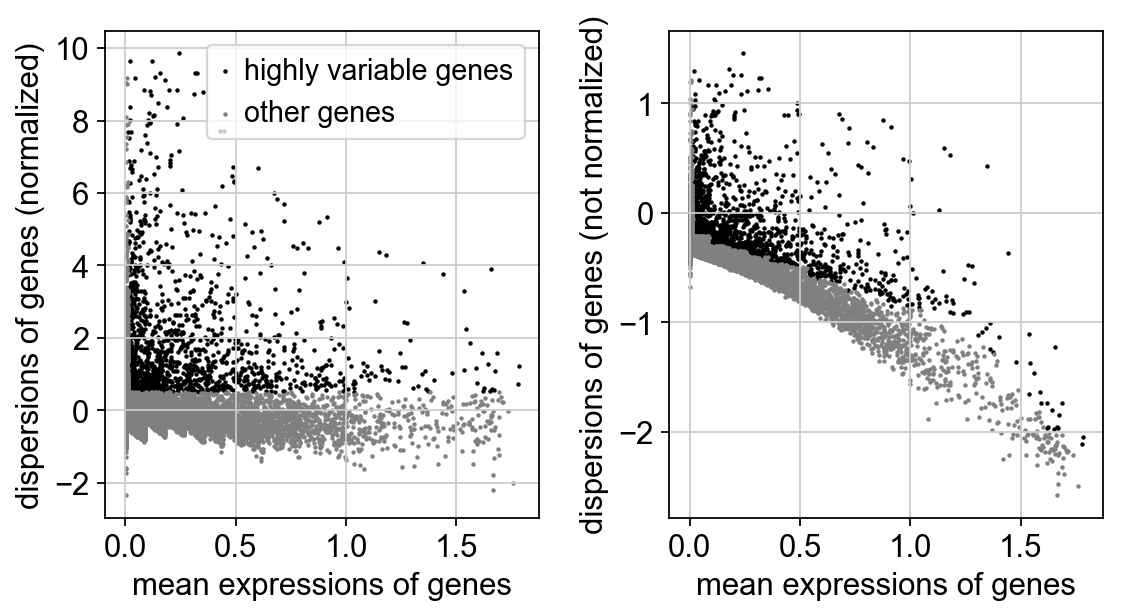

In [16]:
# get and subset to highly variable genes
filter_result = sc.pp.filter_genes_dispersion(adata_all_log_cor.X, min_mean=0.0125, min_disp=0.5)
sc.pl.filter_genes_dispersion(filter_result)
adata_all_log_cor_hvg = adata_all_log_cor[:, filter_result.gene_subset].copy()

In [17]:
# kNN and clustering
sc.pp.pca(adata_all_log_cor_hvg)
sc.pp.neighbors(adata_all_log_cor_hvg, n_neighbors=25, n_pcs=50)
sc.tl.louvain(adata_all_log_cor_hvg, resolution=0.3)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:20.66) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:14.86) --> found 10 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


In [19]:
# compute manifold
sc.tl.umap(adata_all_log_cor_hvg)

computing UMAP
    finished (0:00:24.70) --> added
    'X_umap', UMAP coordinates (adata.obsm)


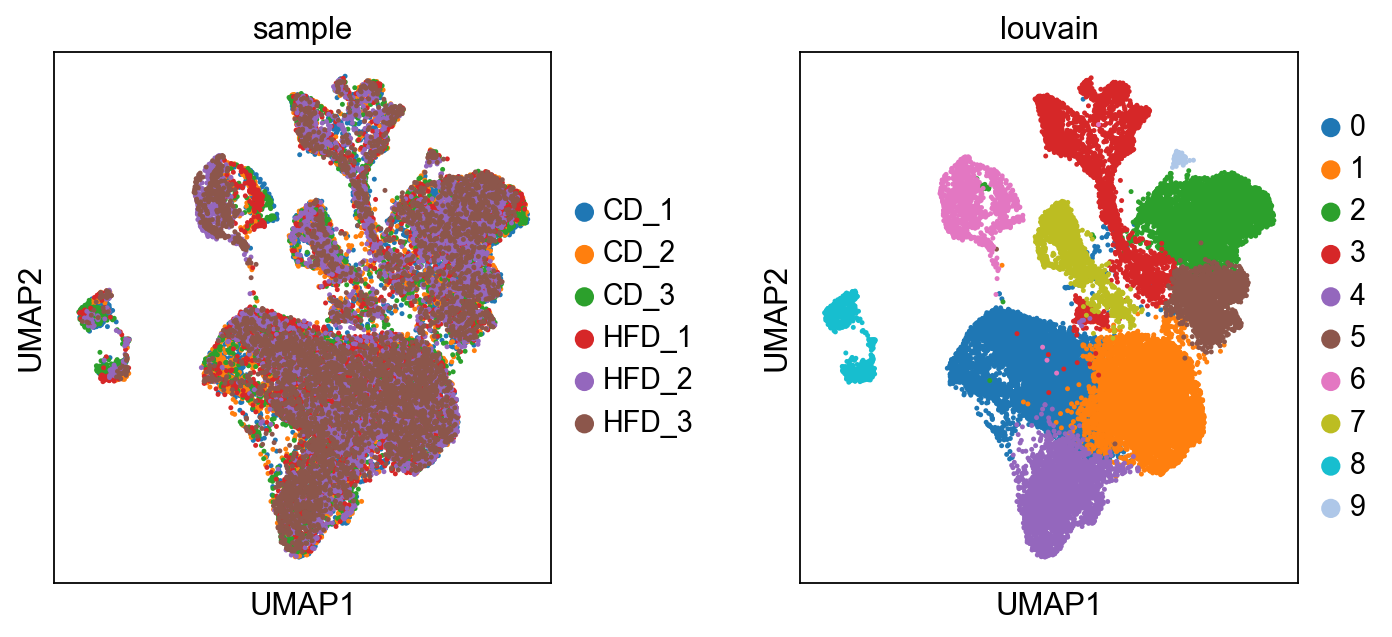

In [20]:
sc.pl.umap(adata_all_log_cor_hvg, color=['sample', 'louvain'],size=20)

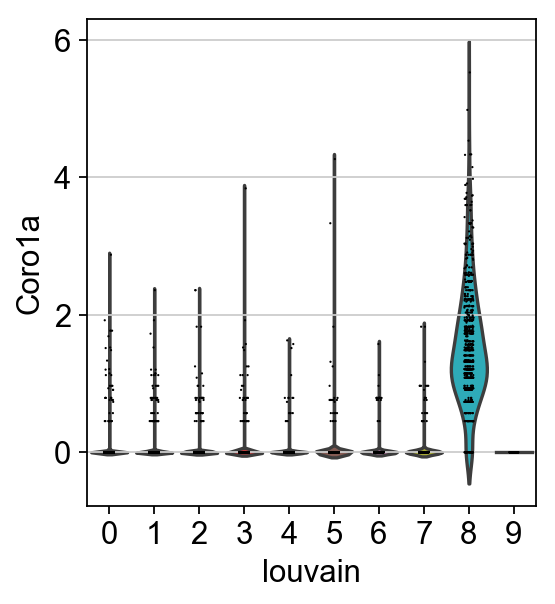

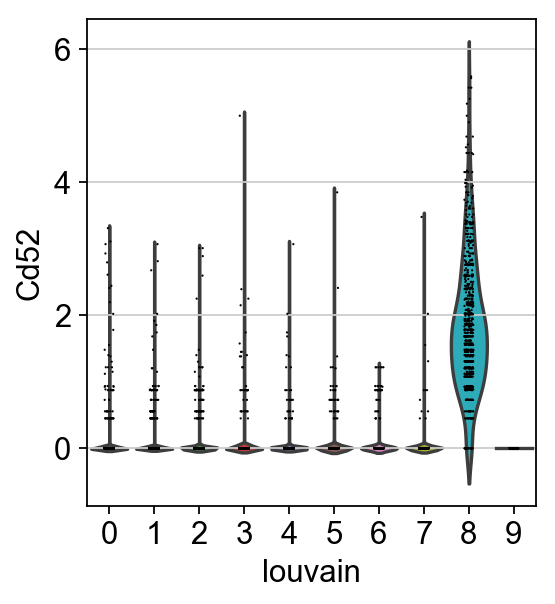

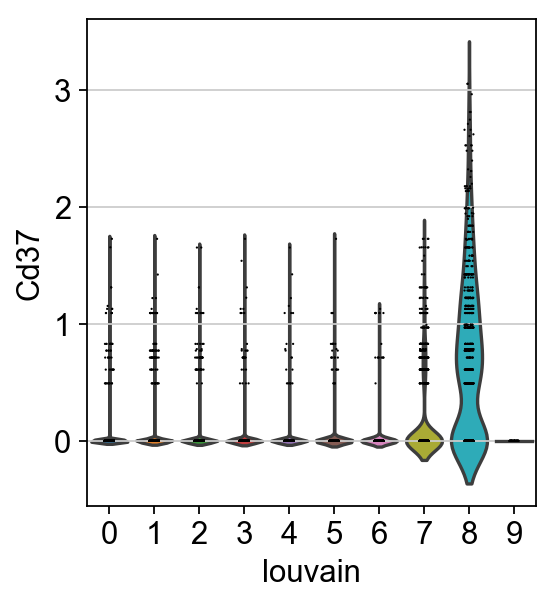

In [21]:
# lymphocyte markers
sc.pl.violin(adata_all_log_cor_hvg, keys='Coro1a', groupby='louvain')
sc.pl.violin(adata_all_log_cor_hvg, keys='Cd52', groupby='louvain')
sc.pl.violin(adata_all_log_cor_hvg, keys='Cd37', groupby='louvain')

we exclude cluster 8 highly expressing lymphocyte markers

In [22]:
lym_cells = np.isin(adata_all_log_cor_hvg.obs['louvain'], ['8'])
print(np.sum(lym_cells))
adata_all_log_cor = adata_all_log_cor[~lym_cells,:].copy()

769


## save processed data

In [23]:
### data submitted to GEO
sc.write('./data/adata_corrected.h5', adata_all_log_cor)